# ITNPAI1 Computer Vision Assignment
### Student: 2938740

## Part II - Image Classification

In [ ]:
# Check for GPU activation, if not 1 activate GPU using Edit -> Notebook Settings -> Hardware Accelerator -> GPU
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

# If Num GPUs = 1 then you can continue with GPU enabled

Num GPUs: 1


In [2]:
# Import modules
import random
import time
from time import perf_counter
from numpy import mean, std, zeros
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
#from sklearn.model_selection import KFold
from matplotlib import pyplot as plt, rcParams
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing.image import ImageDataGenerator


In [3]:
# START OF DISPLAY RANDOM IMAGES
def display_images(trainX_, trainY_):
    # Set display parameters
    plt.rcParams['figure.dpi'] = 96 #
    plt.rcParams['figure.figsize'] = [6, 4]

    # Define categories
    categories = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Boat', 'Truck']

    # Select a random entry for each category
    for cat in range(10):
        ind = [ind for ind, i in enumerate(trainY_) if i == cat]
        rand = random.choice(ind)
        plt.subplot(2, 5, cat+1), plt.title(categories[cat])
        plt.imshow(trainX_[rand]), plt.axis('off')

    # Display images
    plt.show()

    # Clean up memory
    del categories, cat, ind, rand

    return


# load train and test dataset
def load_data():
  	# load dataset
  	(trainX, trainY_), (testX, testY_) = cifar10.load_data()
  	return trainX, trainY_, testX, testY_


def one_hot_Y(Y_):
    # one hot encode test values only
    one_hot_y = to_categorical(Y_)
    return one_hot_y


def one_hot_kfold_strat(trainYk_, testYk_):
    # one hot encode target values
    trainYk = to_categorical(trainYk_)
    testYk = to_categorical(testYk_)
    return trainYk, testYk
    
    
# scale pixels
def scale_pixels(trainX, testX):
  	# convert from integers to floats and scale between 0 and 1
  	trainX = trainX.astype('float32')
  	testX = testX.astype('float32')
  	trainX = trainX / 255.0
  	testX = testX / 255.0
  	return trainX, testX
  

# START OF BASELINE MODEL ARCHITECTURE
def construct_model_baseline(opt):

    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform'))
    model.add(AvgPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# START OF IMPROVED MODEL ARCHITECTURE
def construct_model_improved(opt):

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

#    Not in marking scheme to add layers at this step
#    model = Sequential()
#    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
#    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
#    model.add(MaxPooling2D((2, 2)))
#    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#    model.add(MaxPooling2D((2, 2)))
#    model.add(Flatten())
#    model.add(Dense(2304, activation='relu', kernel_initializer='he_uniform'))
#    model.add(Dense(600, activation='relu', kernel_initializer='he_uniform'))
#    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#    model.add(Dense(10, activation='softmax'))
    
    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# START OF ADVANCED MODEL ARCHITECTURE
def construct_model_advanced(opt):
    
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(4608, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1536, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# START OF EVALUATE MODEL WITH K-FOLD VALIDATION
def evaluate_model(dataX, dataY, model_type, k, batch, epoch, opt, verb, dat_aug):

    scores, histories = list(), list()
    
    # Prepare cross validation
    print('Creating cross validation folds...')
    #kfold = KFold(k, shuffle=True, random_state=42)
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    z=1
    
    ## Enumerate splits
    for train_ix, test_ix in kfold.split(dataX, dataY):

        # Define model
        if (model_type == 'b'):
            print(f"\n\tTraining new baseline model for fold {z}\n\t{'-'*39}")
            model = construct_model_baseline(opt)
        elif (model_type == 'i'):
            print(f"\n\tTraining new improved model for fold {z}\n\t{'-'*39}")
            model = construct_model_improved(opt)
        elif (model_type == 'a'):
            print(f"\n\tTraining new advanced model for fold {z}\n\t{'-'*39}")
            model = construct_model_advanced(opt)
        else:
            print("No such model type exists, please try again with 'b', 'i' or 'a'")


        # Create fold datasets from index splits in for loop
        trainXk, trainYk_, testXk, testYk_ = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

        # One hot encode the targets now that the data has beee split and release memory
        trainYk, testYk = one_hot_kfold_strat(trainYk_, testYk_)
        del trainYk_, testYk_

        # Data augmentation
        if (dat_aug == 1):
            datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
            iterator = datagen.flow(trainXk, trainYk, batch_size=batch)
            steps = int(trainXk.shape[0]/batch)

            # Fit model and checkpoint to save best model only
            callbacks =  [ModelCheckpoint(filepath='final_model.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, mode='auto', period=1)]
            history = model.fit_generator(iterator, steps_per_epoch=steps, epochs=epoch, validation_data=(testXk, testYk), verbose=verb, callbacks=callbacks)
        else:
            # No data augmentation
            # Fit model and checkpoint to save best model only
            callbacks =  [ModelCheckpoint(filepath='final_model.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, mode='auto', period=1)]
            history = model.fit(trainXk, trainYk, epochs=epoch, batch_size=batch, validation_data=(testXk, testYk), verbose=verb, callbacks=callbacks)

        # Evaluate model
        _, acc = model.evaluate(testXk, testYk, verbose=verb)
        # Print results
        print(f"\t{'-'*37}\n\tFold {z}/{k} Validation Accuracy: %.3f" % (acc * 100.0))
        print('\n')
        
        # Store results
        scores.append(acc)
        histories.append(history)
        
        # Save model
        #model.save('final_model.h5')

        # Release memory ready for next fold
        del trainXk, trainYk, testXk, testYk
        
        # Increment fold count
        z += 1

    return model, scores, histories


# START OF DIAGNOSTIC LEARNING CURVES
def summarize_diagnostics(histories):

    # Modified to plot single line for average of all folds per epoch instead of one line per fold
    
    # Extract required dimensions from histories
    folds = [(i+1) for i in range(len(histories))]
    epoch = [(ix+1) for ix, i in enumerate(histories[0].history['accuracy'])]

    # Prepare array for dynamic population
    acc, loss = zeros([len(epoch), len(folds)]), zeros([len(epoch), len(folds)])
    val_acc, val_loss = zeros([len(epoch), len(folds)]), zeros([len(epoch), len(folds)])

    # Extract and populate arrays in correct order
    for e in range(len(epoch)):
        for f in range(len(folds)):
            acc[e][f] = histories[f].history['accuracy'][e]
            loss[e][f] = histories[f].history['loss'][e]
            val_acc[e][f] = histories[f].history['val_accuracy'][e]
            val_loss[e][f] = histories[f].history['val_loss'][e]

    # Plot mean accuracy of folds per epoch
    plt.title('Classification Accuracy')
    plt.plot(epoch, mean(acc, axis=1), 'b--'), plt.plot(epoch, mean(val_acc, axis=1), 'r-')
    plt.legend(['Training Accuracy', 'Test Accuracy']), plt.xlabel('Epoch')
    plt.show()

    # Plot mean loss of folds per epoch
    plt.title('Cross Entropy Loss')
    plt.plot(epoch, mean(loss, axis=1), 'b--'), plt.plot(epoch, mean(val_loss, axis=1), 'r-')
    plt.legend(['Training Loss', 'Test Loss']),  plt.xlabel('Epoch')
    plt.show()
    
    return


# START OF ACCURACY SUMMARY
def summarise_accuracy(scores):

    # print summary
    print('\n\tAccuracy: mean=%.3f std=%.3f, k-folds=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    
    # Calculate epochs
    # box and whisker plots of results
    plt.title('\nBoxplot of accuracy')
    plt.boxplot(scores)
    plt.ylabel('Accuracy (0 - 1)')
    plt.xlabel('Across all epochs'), plt.xticks([])
    plt.show()
    
    return


# EXECUTE SCRIPT
def execute_net(model_type='b', k=5, batch=64, epoch=16, opt=SGD(lr=0.001, momentum=0.9), verb=1, dat_aug=0, tuning=0):

    print(f"Loading data...")
    trainX_, trainY_, testX_, testY_ = load_data()

    # Skip if hyperparameter tuning
    if (tuning==0):
        # Display test images - Must be run before one-hot encoding
        print("Display 10 random images, one from each category:\n")
        display_images(trainX_, trainY_)
        print("\n\nDisplay 10 more random images, one from each category:\n")
        display_images(trainX_, trainY_)
    
    # One hot testY data only, scale X data
    print(f"\nTransforming data...")
    testY = one_hot_Y(testY_)
    trainX, testX = scale_pixels(trainX_, testX_)
    # Release memory but keep trainY_ as it's converted later
    del trainX_, testX_, testY_

    # Evaluate model
    print(f"Evaluating data...")
    tik = perf_counter()
    model, scores, histories = evaluate_model(trainX, trainY_, model_type, k, batch, epoch, opt, verb, dat_aug)
    tok = perf_counter()
    print(f"\nTraining run took {round(tok-tik, 3)} seconds")

    # Learning curves
    print(f"\nSummarising results...")
    summarize_diagnostics(histories)
    print(f"\n\nDisplaying spread of accuracy across all epochs...")
    summarise_accuracy(scores)

    # Print model summary for documentation
    print("\n\n")
    print(model.summary())







Loading data...
Display 10 random images, one from each category:



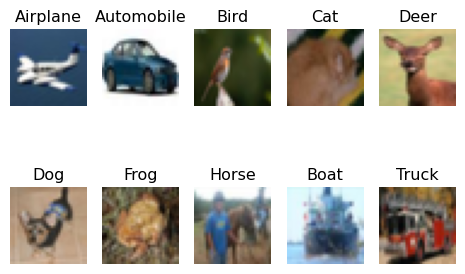



Display 10 more random images, one from each category:



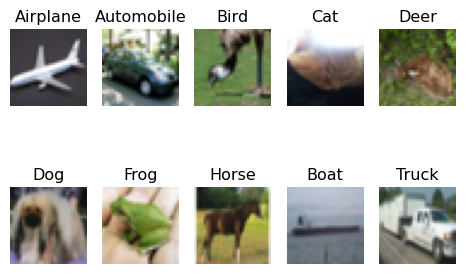


Transforming data...
Evaluating data...
Creating cross validation folds...

	Training new baseline model for fold 1
	---------------------------------------
Epoch 1/16
625/625 [==============================] - 3s 5ms/step - loss: 2.0884 - accuracy: 0.2344 - val_loss: 1.7232 - val_accuracy: 0.3836
Epoch 2/16
625/625 [==============================] - 3s 4ms/step - loss: 1.6407 - accuracy: 0.4149 - val_loss: 1.5233 - val_accuracy: 0.4569
Epoch 3/16
625/625 [==============================] - 3s 4ms/step - loss: 1.4944 - accuracy: 0.4648 - val_loss: 1.4315 - val_accuracy: 0.4880
Epoch 4/16
625/625 [==============================] - 3s 4ms/step - loss: 1.3911 - accuracy: 0.4976 - val_loss: 1.4031 - val_accuracy: 0.4958
Epoch 5/16
625/625 [==============================] - 3s 4ms/step - loss: 1.3307 - accuracy: 0.5286 - val_loss: 1.3356 - val_accuracy: 0.5258
Epoch 6/16
625/625 [==============================] - 3s 4ms/step - loss: 1.2716 - accuracy: 0.5491 - val_loss: 1.2916 - val_accurac

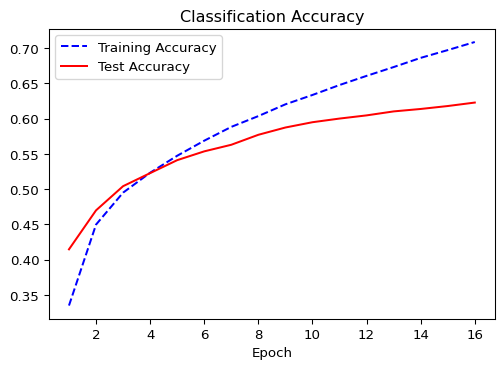

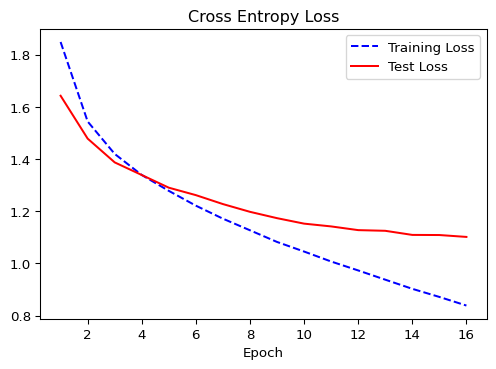



Displaying spread of accuracy across all epochs...

	Accuracy: mean=62.266 std=1.297, k-folds=5


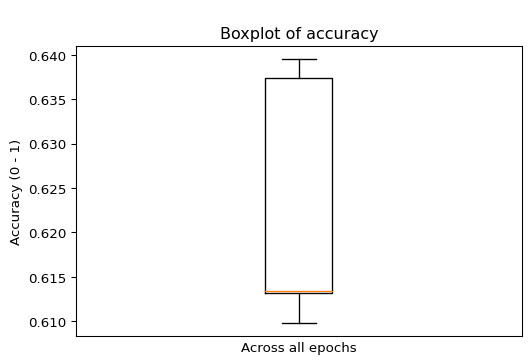




Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
average_pooling2d_4 (Average (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               460900    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 489,974
Trainable params: 489,974
Non-trainable params: 0
_____________________________________________

In [6]:
# Execute net in baseline mode (all parameters are defaulted in execute_net function)
execute_net()

Loading data...

Transforming data...
Evaluating data...
Creating cross validation folds...

	Training new improved model for fold 1
	---------------------------------------
Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9878 - accuracy: 0.2830 - val_loss: 1.5545 - val_accuracy: 0.4535
Epoch 2/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.4900 - accuracy: 0.4644 - val_loss: 1.3722 - val_accuracy: 0.5120
Epoch 3/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.3242 - accuracy: 0.5309 - val_loss: 1.3071 - val_accuracy: 0.5400
Epoch 4/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2293 - accuracy: 0.5687 - val_loss: 1.2605 - val_accuracy: 0.5597
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1490 - accuracy: 0.5999 - val_loss: 1.1606 - val_accuracy: 0.5970
Epoch 6/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0655 - accuracy: 0.6329 - va

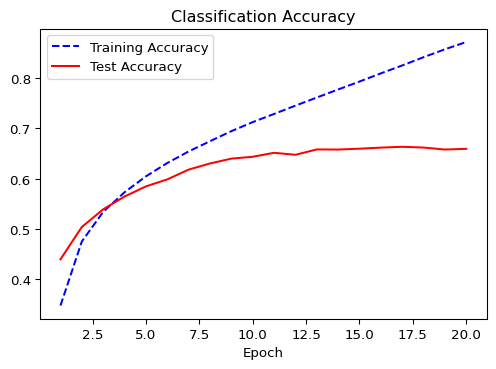

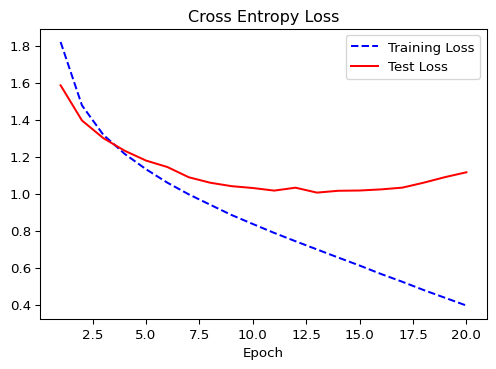



Displaying spread of accuracy across all epochs...

	Accuracy: mean=65.952 std=0.519, k-folds=5


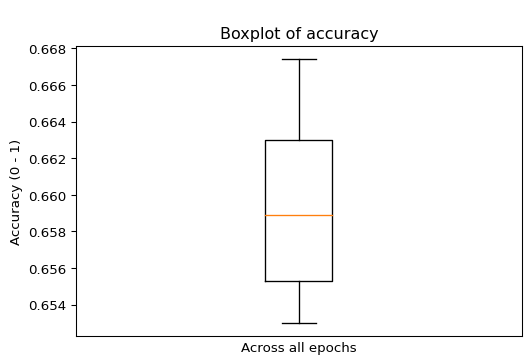




Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 100)               1254500   
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1010      
Total params: 1,274,902
Trainable params: 1,274,902
Non-trainable params: 0
________________________________________

In [ ]:
# Execute net in improved mode (all parameters are defaulted in execute_net function)
# Changed AvgPool-> MaxPool, conv kernel (5,5)->(3,3), increase num_filters on conv2, epoch 16->20 and lr 0.001->0.0005
execute_net(model_type='i', batch=32, epoch=20, opt=SGD(lr=0.0005, momentum=0.9), verb=1, dat_aug=0, tuning=1)

Loading data...

Transforming data...
Evaluating data...
Creating cross validation folds...

	Training new advanced model for fold 1
	---------------------------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1406/1406 [==============================] - 35s 23ms/step - loss: 2.2263 - accuracy: 0.2609 - val_loss: 1.6841 - val_accuracy: 0.4562
Epoch 2/30
1406/1406 [==============================] - 32s 23ms/step - loss: 1.3084 - accuracy: 0.5309 - val_loss: 1.5522 - val_accuracy: 0.5150
Epoch 3/30
1406/1406 [==============================] - 32s 23ms/step - loss: 1.1239 - accuracy: 0.6078 - val_loss: 0.9337 - val_accuracy: 0.6730
Epoch 4/30
1406/1406 [==============================] - 33s 24ms/step - loss: 0.9823 - accuracy: 0.6627 - val_loss: 0.9417 - val_accuracy: 0.6818
Epoch 5/30
1406/1406 [==============================] - 32s 23ms/step - loss: 0.8633 - accuracy: 0.7116 - val_loss: 0.8694 - val_accuracy: 0.7046
Epoch 6/30
1406/1406 [==============================] - 33s 23ms/step - loss: 0.7998 - accuracy: 0.7305 - val_loss: 0.8797 - val_accuracy: 0.7430
Epoch 7/30
1406/1406 [==============================] - 33s 23ms/step - loss: 0.7195 - accuracy: 0.7632 - val_loss: 0.6374 -

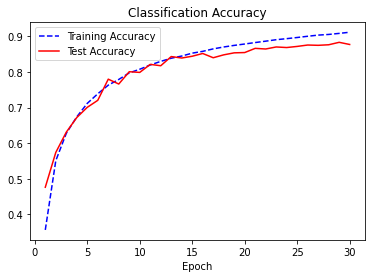

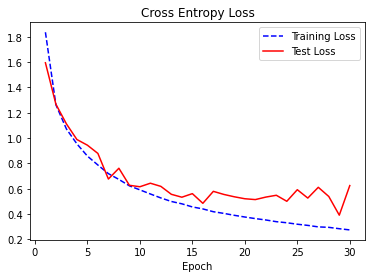



Displaying spread of accuracy across all epochs...

	Accuracy: mean=87.710 std=1.130, k-folds=10


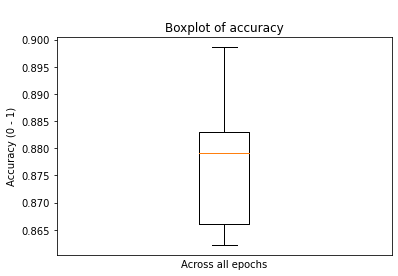




Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, None, None, 64)    1792      
_________________________________________________________________
batch_normalization_54 (Batc (None, None, None, 64)    256       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, None, None, 64)    36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, None, None, 64)    0         
_________________________________________________________________
dropout_54 (Dropout)         (None, None, None, 64)    0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, None, None, 128)   73856     
_________________________________________________________________
batch_normalization_55 (Batc (None, None, None, 128

In [ ]:
# Execute net in advanced mode with previously identified optimal parameters
execute_net(model_type='a', k=10, batch=32, epoch=30, opt='adam', verb=1, dat_aug=1, tuning=1)

In [ ]:
############ END OF TESTING ####################

Loading data...

Transforming data...

Final model test accuracy: > 86.540



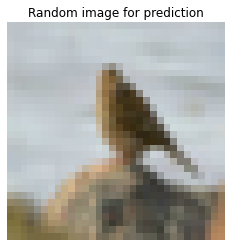

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '




Image predicted to be: Bird
The selected random image has category - ['Bird']



In [5]:
# Evaluate final model

# Load data
print(f"Loading data...")
trainX_, trainY_, testX_, testY_ = load_data()

# One hot testY data only, scale X data
print(f"\nTransforming data...")
testY = one_hot_Y(testY_)
trainX, testX = scale_pixels(trainX_, testX_)
# Release memory keeping only testX and testY
del trainX_, trainY_, testX_, testY_, trainX

# load model
model = load_model('final_model.h5')
# evaluate model on test dataset
_, acc = model.evaluate(testX, testY, verbose=0)
print(f"\nFinal model test accuracy: > %.3f\n" % (acc * 100.0))

# Select random image from the test set and display
categories = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Boat', 'Truck']
ind = [ind for ind, i in enumerate(testY)]
rand = random.choice(ind)
y_random = testY[rand]
y_cat = [x for i,x in enumerate(categories) if y_random[i]]
plt.imshow(testX[rand]), plt.title('Random image for prediction')
plt.axis('off')
plt.show()

# Use model to predict class of selected image
test_img = testX[rand].reshape(1, 32, 32, 3)
y_pred = model.predict_classes(test_img)
print(f"\n\nImage predicted to be: {categories[y_pred[0]]}")
print(f"The selected random image has category - {y_cat}\n")